In [8]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

In [3]:
from model_switcher import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [95]:
my_model = model_switcher(model_name = 'colorful_model',
                          data_name = 'cifar10',
                          loss_name = 'colorful_loss',
                          exp_id  = 'experiment2')

In [96]:
vars(my_model)

{'collname': 'colorful_model_colorful_loss',
 'data_name': 'cifar10',
 'dbname': 'cifar10',
 'exp_fn': <class experiments.cifar10 at 0x7f0deb15b808>,
 'exp_id': 'experiment2',
 'layers': ['conv1_1',
  'conv1_2',
  'conv2_1',
  'conv2_2',
  'conv3_1',
  'conv3_2',
  'conv3_3',
  'conv4_1',
  'conv4_2',
  'conv4_3',
  'conv5_1',
  'conv5_2',
  'conv5_3',
  'conv6_1',
  'conv6_2',
  'conv6_3',
  'conv7_1',
  'conv7_2',
  'conv7_3',
  'conv8_1',
  'conv8_2',
  'conv8_3',
  'pred'],
 'loss_fn': <function losses.colorful_loss>,
 'loss_name': 'colorful_loss',
 'model_fn': <function models.colorful_model>,
 'model_name': 'colorful_model'}

In [97]:

coll = p_get_coll(vars(my_model)['collname'], vars(my_model)['dbname'])
print(coll)

coll.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'cifar10'), u'colorful_model_colorful_loss.files')


[u'experiment2']

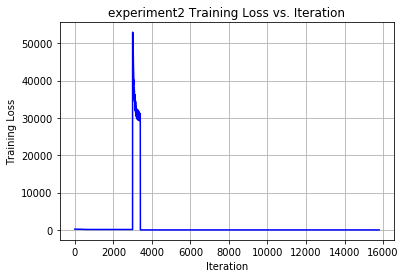

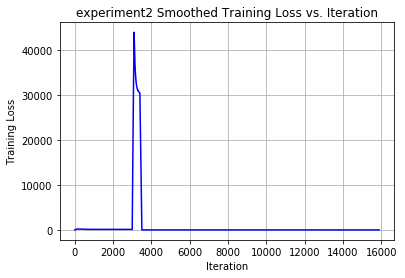

In [98]:
# TODO Double check this. Bit hacky
texp_id = coll.distinct('exp_id')[-1]
p22_training(texp_id,coll)

In [101]:
def p22_training2(exp_id, coll):
    def get_losses(exp_id):
        """
        Gets all loss entries from the database and concatenates them into a vector
        """
        q_train = {'exp_id' : exp_id, 'train_results' : {'$exists' : True}}
        return np.array([_r['loss'] 
                         for r in coll.find(q_train, projection = ['train_results']) 
                         for _r in r['train_results']])

    def get_boxcar(num_pts, total_length):
        my_ones = np.ones(num_pts)/num_pts
        return np.hstack([my_ones])

    ydict = {}
    ydict['losses'] = get_losses(exp_id = exp_id)
    smoothing_num = 100;
    my_box = get_boxcar(smoothing_num, ydict['losses'].shape[0])
    ydict['smooth' + str(smoothing_num)] = signal.convolve(ydict['losses'],my_box)
    #4200
    #7800
    plt.plot(ydict['losses'][4200:], color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Training Loss")
    plt.title(exp_id + " Training Loss vs. Iteration")
    plt.grid()
    plt.show()
    
    
    plt.plot(ydict['smooth' + str(smoothing_num)][4200:], color="blue")
    plt.xlabel("Iteration")
    plt.ylabel("Training Loss")
    plt.title(exp_id + " Smoothed Training Loss vs. Iteration")
    plt.grid()
    plt.show()

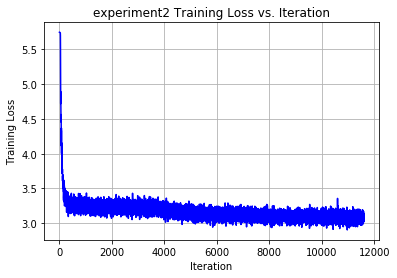

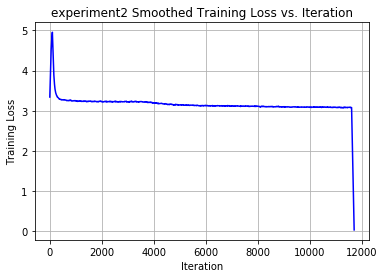

In [102]:
# TODO Double check this. Bit hacky
texp_id = coll.distinct('exp_id')[-1]
p22_training2(texp_id,coll)